# Computer Vision Classification

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def name_of_class(class_number):
    class_name=['T-shirt/top', 'Trouser/pants', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    return (class_name[class_number])

In [4]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()



![title](img/samples.jpg)

### Normalization

In [9]:
training_images = training_images/255.0
test_images = test_images/255.0


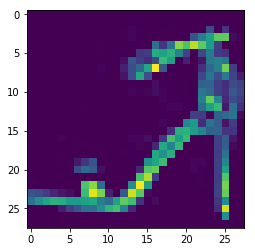

Sandal


In [21]:
plt.imshow(training_images[8])
plt.show()
print (name_of_class(training_labels[8]))

### Structure for Neural Network

In [37]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


**Flatten**: Images are 2 Dimensional, Flatten turns it into a 1 dimensional set.

**Dense**: Adds a layer with certain number of neurons

Each layer of neurons is provided with an **activation function** which determines how the neuron behaves. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.


**Softmax** takes a set of values, and effectively picks the biggest one

### Training

In [38]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)



Epoch 1/5
60000/60000 [==============================] - 13s 219us/step - loss: 1.0830 - acc: 0.66390s - loss: 1.106
Epoch 2/5
60000/60000 [==============================] - 12s 207us/step - loss: 0.6396 - acc: 0.7685
Epoch 3/5
60000/60000 [==============================] - 12s 202us/step - loss: 0.5637 - acc: 0.7990
Epoch 4/5
60000/60000 [==============================] - 13s 215us/step - loss: 0.5204 - acc: 0.8156
Epoch 5/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.4921 - acc: 0.8257


### Evaluation

In [41]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 66us/step


[0.5106464076042175, 0.8194]

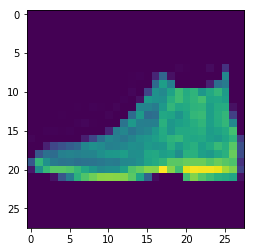

Sneaker


In [95]:
classifications = model.predict(test_images)

index_of_test = 0

plt.imshow(test_images[index_of_test])
plt.show()

identified_class = np.argmax(classifications[index_of_test])
print(name_of_class(identified_class))